# DATA ANALYTICS
## ASSIGNMENT - 1

## Part-1
QUESTION 1

##### Data Pre-processing (Cleaning)

In [2]:
import DataCleaning as Dc
#need to clean education and fnlwgt columns here


In [5]:
# Cleaning education
original_df, working_df = Dc.load_dataset('M25_DA_A1_Dataset1.csv')

# All cleaning operations on working_df only
working_df = Dc.check_missing_values(working_df, "50")
# working_df = Dc.detect_outliers_iqr(working_df, "income")

Dataset loaded successfully with shape: (48843, 15)
Checking column: 50
Rows detected for missing/invalid values in '50':
        50      Workclass    fnlwgt   Education  Education_Num  \
48841  NaN        Private   83891.0   Bachelors           13.0   
48842  NaN   Self-emp-inc  182148.0   Bachelors           13.0   

            Martial_Status        Occupation Relationship  \
48841             Divorced      Adm-clerical    Own-child   
48842   Married-civ-spouse   Exec-managerial      Husband   

                      Race    Sex  Capital_Gain  Capital_Loss  Hours_per_week  \
48841   Asian-Pac-Islander   Male        5455.0           0.0            40.0   
48842                White   Male           0.0           0.0            60.0   

              Country   Target  
48841   United-States   <=50K.  
48842   United-States    >50K.  
No rows deleted.
Check complete.


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

{'Bachelors': 1511601409.0, 'HS-grad': 2977279353.0, '11th': 353525318.0, 'Masters': 482192559.0, '9th': 150449180.0, 'Some-college': 2066871041.0, 'Assoc-acdm': 310113821.0, 'Assoc-voc': 369786888.0, '7th-8th': 179147014.0, 'Doctorate': 109349744.0, 'Prof-school': 155612621.0, '5th-6th': 116998125.0, '10th': 272983724.0, '1st-4th': 58050070.0, 'Preschool': 19832208.0, '12th': 129782587.0, 'nan': nan}

Grouped Education Frequencies:

Elementary Education (until class 8th) : 374027417.0
Secondary Education (class 9th-10th) : 423432904.0
Senior Secondary Education (class 11th-12th) : 3460587258.0
Associate degree : 679900709.0
Some college : 2066871041.0
Graduation : 1511601409.0
Post-graduation : 747154924.0

DataFrame for Plotting:

                                        Category         level        fnlwgt
0         Elementary Education (until class 8th)     Preschool  1.983221e+07
1         Elementary Education (until class 8th)       1st-4th  5.805007e+07
2         Elementary Educa

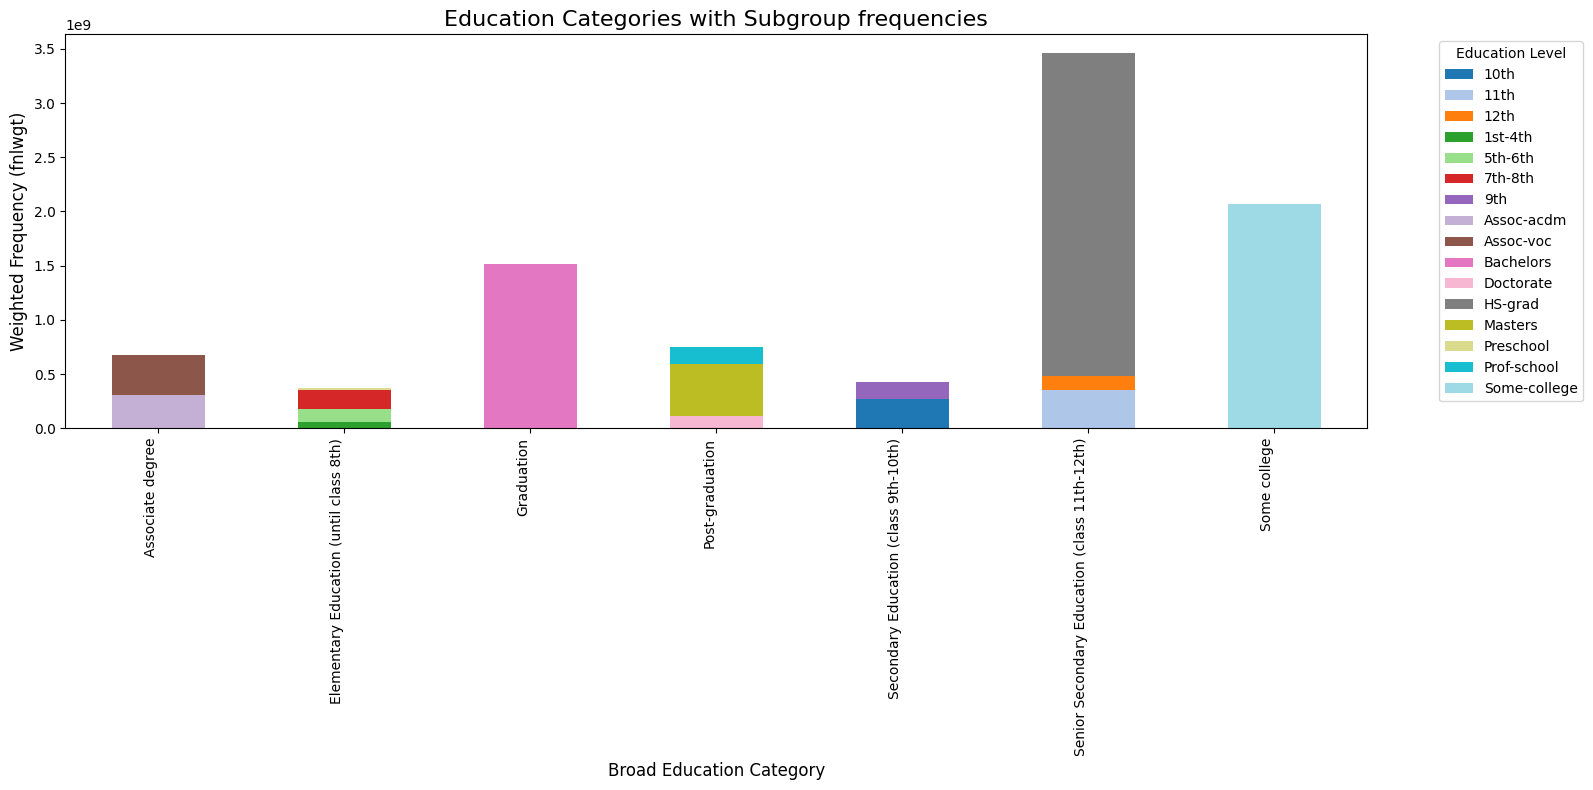

In [5]:


fd=pd.read_csv("M25_DA_A1_Dataset1.csv")
# print(fd)

#iterate through rows using iterrows
#iterrows returns an iterator that yields each row as a tuple containing the index and the row data as a Series

education_freq={}
for index, row in fd.iterrows():
    education=str(row["Education"]).strip() #to remove any leading or trailing spaces, convrted to str because otherwise strip wasnt allowed on floating point values
    sample_wt=row["fnlwgt"]

    if education in education_freq:
        education_freq[education] += sample_wt 
    else:
        education_freq[education] = sample_wt 

print(education_freq)


# NOW WE WILL GROUP THESE EDUCATION LEVELS INTO BROADER CATEGORIES
custom_groups = {
    #based on the output we got
    "Elementary Education (until class 8th)": ["Preschool", "1st-4th", "5th-6th", "7th-8th"],
    "Secondary Education (class 9th-10th)": ["9th", "10th"],
    "Senior Secondary Education (class 11th-12th)": ["11th", "12th", "HS-grad"],
    "Associate degree": ["Assoc-acdm", "Assoc-voc"],
    "Some college": ["Some-college"],
    "Graduation": ["Bachelors"],
    "Post-graduation": ["Masters", "Doctorate", "Prof-school"]
}

#now we need to store total fequencies across each group
grouped_freq = {}
for key,value in custom_groups.items():  #.items() returns key-value pairs
    total=0
    for val in value:
        if val in education_freq:
            total+=education_freq[val]
    grouped_freq[key]=total 

print("\nGrouped Education Frequencies:\n")
for key,value in grouped_freq.items():
    print(key, ":", value)
        

#VISUALIZATION

rows=[]
#columns:"Category", level:subgroup, fnlwgt:frequency
for key,value in custom_groups.items():
    for val in value:
        if val in education_freq:
            rows.append({"Category": key, "level": val, "fnlwgt": education_freq[val]})

df_plot = pd.DataFrame(rows)
print("\nDataFrame for Plotting:\n")
print(df_plot)

# PLOTTING THE GRAPH
pivot_df=df_plot.pivot(index='Category', columns='level', values='fnlwgt').fillna(0)
ax=pivot_df.plot(kind='bar', stacked=True, figsize=(16,8), cmap='tab20') # kind=bar, and stacked=true creates stacked bars, cmap=tab20 assigns distinct colors for each subgroup

plt.xticks(rotation=90,ha='right') #rotate the x axis by 90 degrees for better readability
plt.title("Education Categories with Subgroup frequencies", fontsize=16)
plt.xlabel("Broad Education Category", fontsize=12)
plt.ylabel("Weighted Frequency (fnlwgt)", fontsize=12)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


QUESTION 2

In [6]:
#Distribution of ages and hours worked per week  

     Age    Frequency
0   17.0  109187194.0
1   18.0  160527484.0
2   19.0  201199081.0
3   20.0  215869624.0
4   21.0  204216779.0
..   ...          ...
69  86.0     290660.0
70  87.0     347803.0
71  88.0    1502915.0
72  89.0     359622.0
73  90.0    9760080.0

[74 rows x 2 columns]


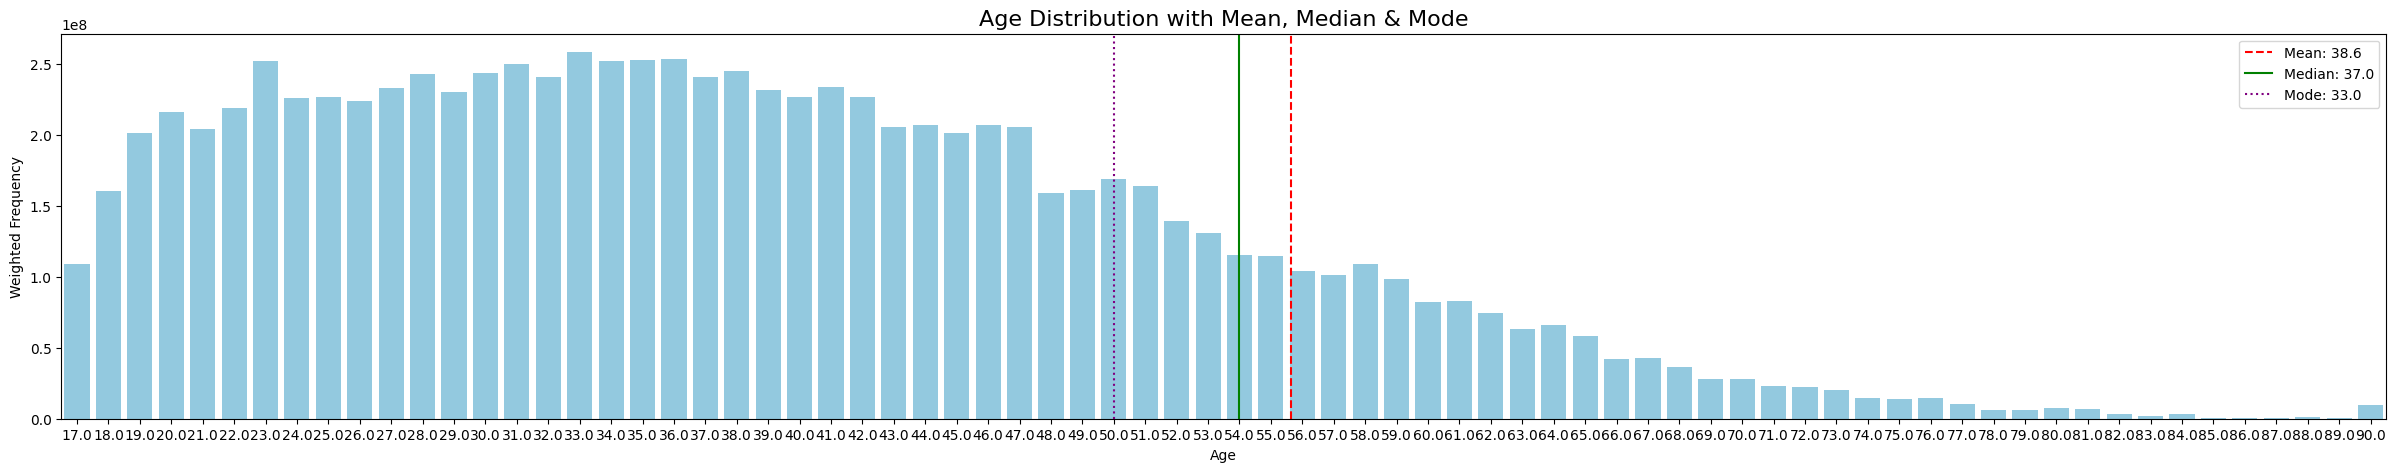

    Hours_per_Week  Hours_Frequency
0              1.0        4961487.0
1              2.0       10290713.0
2              3.0       10908541.0
3              4.0       13919826.0
4              5.0       16516928.0
..             ...              ...
91            95.0         299070.0
92            96.0        2595205.0
93            97.0         332823.0
94            98.0        2481787.0
95            99.0       22696260.0

[96 rows x 2 columns]


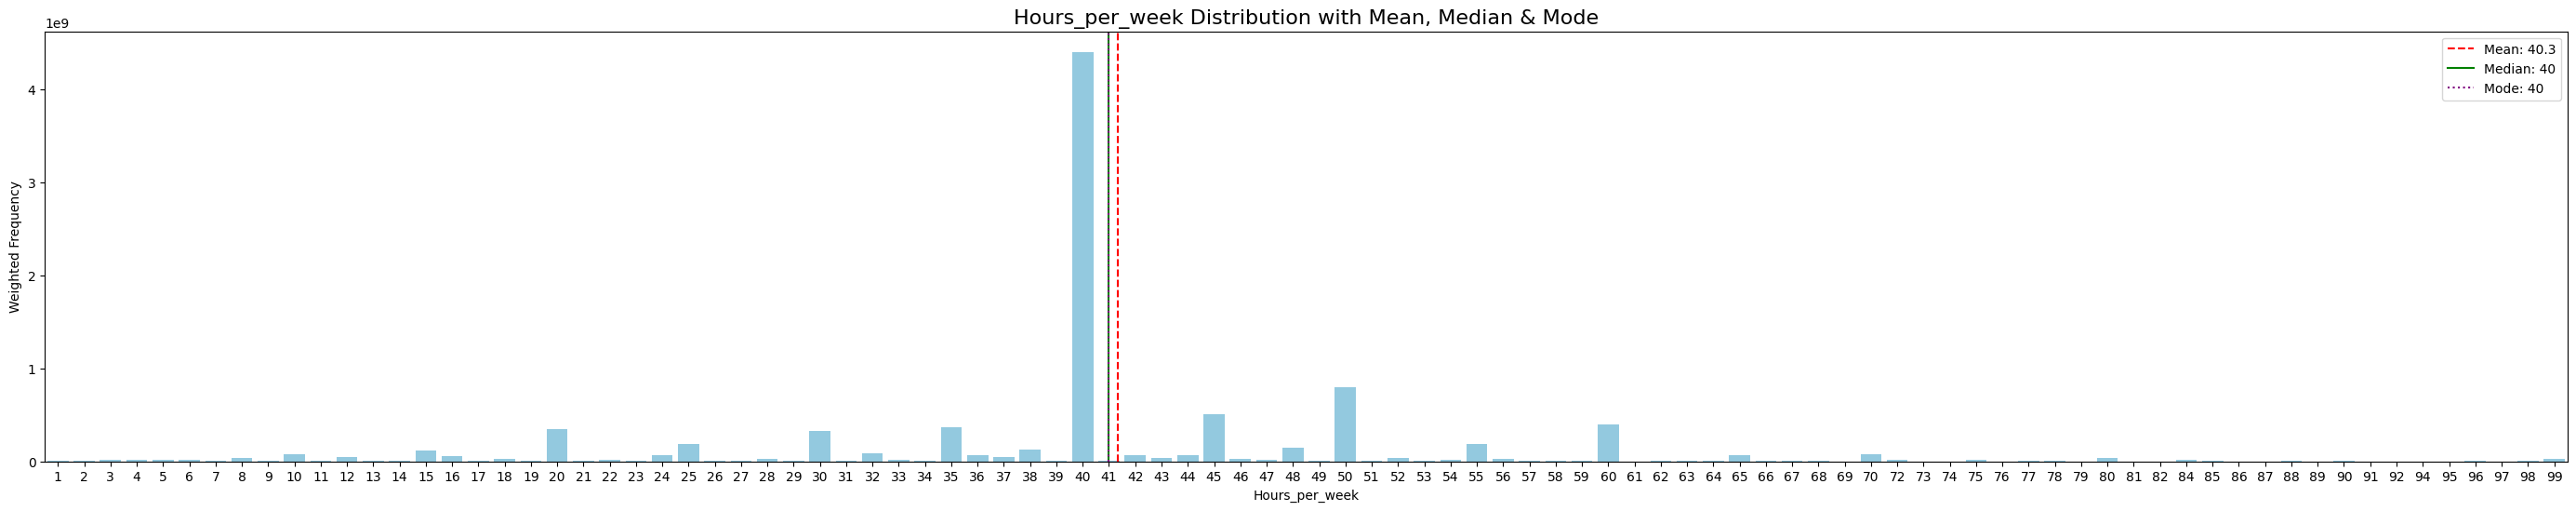

In [ ]:
# AGES

fd['50']=pd.to_numeric(fd['50'], errors='coerce')
age_freq=fd.groupby('50')['fnlwgt'].sum().reset_index()
age_freq.columns=['Age', 'Frequency']  #renames the columns as age anf frequency
print(age_freq)

plt.figure(figsize=(30,5))
sns.barplot(x='Age', y='Frequency', data=age_freq, color='skyblue')

# Calculate stats
mean_age = np.average(age_freq['Age'], weights=age_freq['Frequency'])
median_age = age_freq.loc[age_freq['Frequency'].cumsum() >= age_freq['Frequency'].sum()/2, 'Age'].iloc[0]
mode_age = age_freq.loc[age_freq['Frequency'].idxmax(), 'Age']

# Add vertical lines
plt.axvline(mean_age, color='red', linestyle='--', label=f"Mean: {mean_age:.1f}")
plt.axvline(median_age, color='green', linestyle='-', label=f"Median: {median_age}")
plt.axvline(mode_age, color='purple', linestyle=':', label=f"Mode: {mode_age}")

plt.title('Age Distribution with Mean, Median & Mode', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Weighted Frequency')
plt.legend()
plt.show()

# HOURS WORKED PER WEEK


# Convert Hours_per_week to numeric
fd['Hours_per_week'] = pd.to_numeric(fd['Hours_per_week'], errors='coerce')

# Group by Hours_per_week and sum fnlwgt
hours_freq = fd.groupby('Hours_per_week')['fnlwgt'].sum().reset_index()
hours_freq.columns = ['Hours_per_Week', 'Hours_Frequency']

print(hours_freq)
hours_freq['Hours_per_Week'] = hours_freq['Hours_per_Week'].astype(int)

# Plot barplot
plt.figure(figsize=(35,6))
sns.barplot(x='Hours_per_Week', y='Hours_Frequency', data=hours_freq, color='skyblue')

# Calculate weighted stats
mean_hours = np.average(hours_freq['Hours_per_Week'], weights=hours_freq['Hours_Frequency'])
median_hours = hours_freq.loc[hours_freq['Hours_Frequency'].cumsum() >= hours_freq['Hours_Frequency'].sum()/2, 'Hours_per_Week'].iloc[0]
mode_hours = hours_freq.loc[hours_freq['Hours_Frequency'].idxmax(), 'Hours_per_Week']

# Add vertical lines
plt.axvline(mean_hours, color='red', linestyle='--', label=f"Mean: {mean_hours:.1f}")
plt.axvline(median_hours, color='green', linestyle='-', label=f"Median: {median_hours}")
plt.axvline(mode_hours, color='purple', linestyle=':', label=f"Mode: {mode_hours}")

plt.title('Hours_per_week Distribution with Mean, Median & Mode', fontsize=16)
plt.xlabel('Hours_per_week')
plt.ylabel('Weighted Frequency')
plt.legend()
plt.show()



Hours_per_week:
Part-time, full-time, over-time

Age:
0<Child<18, 18<=Youth<30, 30<=Adult<50, 50<=Senior

         50 Age_Group
0      38.0     Adult
1      53.0    Senior
2      28.0     Youth
3      37.0     Adult
4      49.0     Adult
...     ...       ...
48838  38.0     Adult
48839  44.0     Adult
48840  35.0     Adult
48841   NaN    Senior
48842   NaN    Senior

[48843 rows x 2 columns]


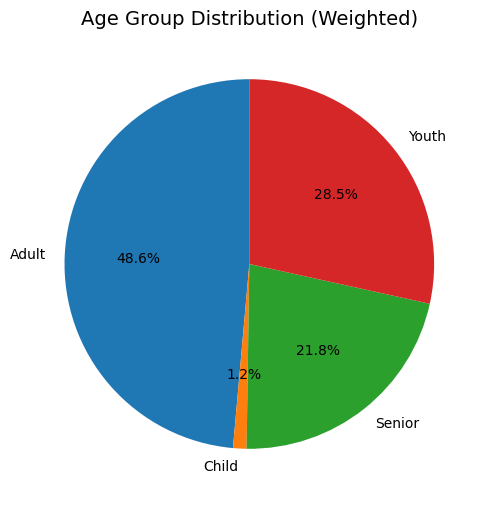

       Hours_per_week Hours_Group
0                40.0   Full-time
1                13.0   Part-time
2                40.0   Full-time
3                40.0   Full-time
4                40.0   Full-time
...               ...         ...
48838            36.0   Full-time
48839            40.0   Full-time
48840            50.0   Over-time
48841            40.0   Full-time
48842            60.0   Over-time

[48843 rows x 2 columns]


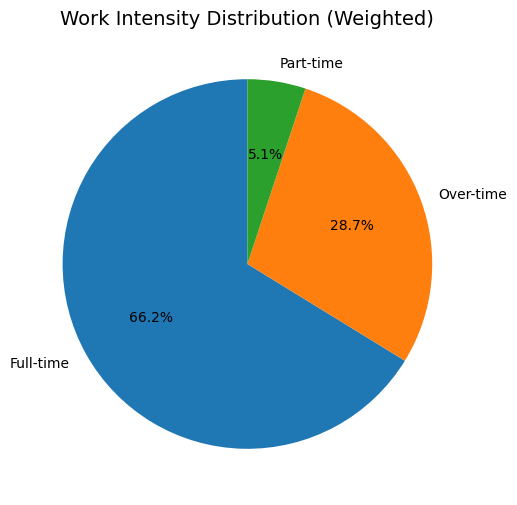

  Age_Group        fnlwgt
0     Adult  4.500940e+09
1     Child  1.091872e+08
2    Senior  2.017668e+09
3     Youth  2.635780e+09
  Hours_Group        fnlwgt
0   Full-time  6.135568e+09
1   Over-time  2.657025e+09
2   Part-time  4.709822e+08
   Age_Group Hours_Group        fnlwgt
0      Adult   Full-time  2.976734e+09
1      Adult   Over-time  1.288852e+09
2      Adult   Part-time  2.353538e+08
3      Child   Full-time  7.358432e+07
4      Child   Over-time  3.026798e+07
5      Child   Part-time  5.334896e+06
6     Senior   Full-time  1.347339e+09
7     Senior   Over-time  5.706036e+08
8     Senior   Part-time  9.972600e+07
9      Youth   Full-time  1.737912e+09
10     Youth   Over-time  7.673012e+08
11     Youth   Part-time  1.305675e+08


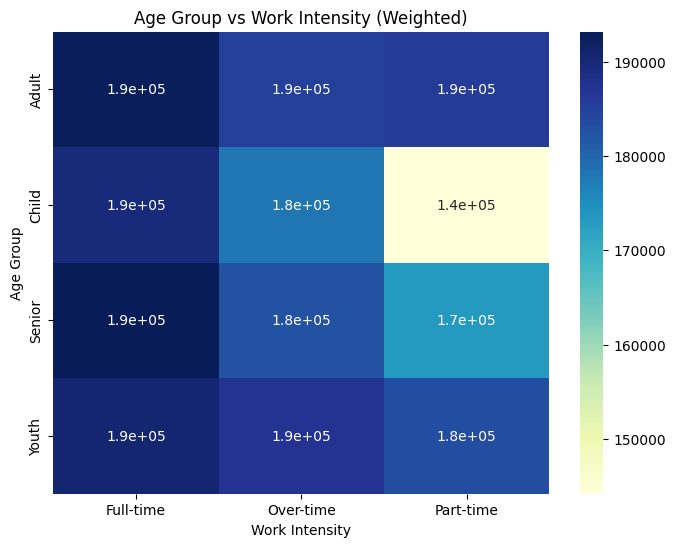

In [41]:
#GROUPING AGE
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 30:
        return 'Youth'
    elif 30 <= age < 50:
        return 'Adult'
    else:
        return 'Senior'
fd['Age_Group'] = fd['50'].apply(age_group)
print(fd[['50', 'Age_Group']])

# Pie chart for Age Groups
age_group_freq = fd.groupby("Age_Group")["fnlwgt"].sum()
plt.figure(figsize=(6,6))
plt.pie(age_group_freq, labels=age_group_freq.index, autopct="%.1f%%", startangle=90)
plt.title("Age Group Distribution (Weighted)", fontsize=14)
plt.show()

#GROUPING HOURS_PER_WEEK
def hours_group(hours):
    if hours < 20:
        return 'Part-time'
    elif 20 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Over-time'
fd['Hours_Group'] = fd['Hours_per_week'].apply(hours_group)
print(fd[['Hours_per_week', 'Hours_Group']])

# Pie chart for Hours Groups
hours_group_freq = fd.groupby("Hours_Group")["fnlwgt"].sum()
plt.figure(figsize=(6,6))
plt.pie(hours_group_freq, labels=hours_group_freq.index, autopct="%.1f%%", startangle=90)
plt.title("Work Intensity Distribution (Weighted)", fontsize=14)
plt.show()

#Weighted counts using fnlwgt
age_dist = fd.groupby('Age_Group')['fnlwgt'].sum().reset_index()
work_dist = fd.groupby('Hours_Group')['fnlwgt'].sum().reset_index()
relation = fd.groupby(['Age_Group', 'Hours_Group'])['fnlwgt'].sum().reset_index()
print(age_dist)
print(work_dist)
print(relation)

#HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = fd.pivot_table(index="Age_Group", columns="Hours_Group", values="fnlwgt")

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".1e", cmap="YlGnBu")
plt.title("Age Group vs Work Intensity (Weighted)")
plt.ylabel("Age Group")
plt.xlabel("Work Intensity")
plt.show()


#### QUESTION 3

     Capital_Gain  Gain_Frequency
0             0.0    8.509025e+09
1           114.0    1.466199e+06
2           401.0    7.937500e+05
3           594.0    1.119437e+07
4           914.0    1.459142e+06
..            ...             ...
118       25236.0    2.946436e+06
119       27828.0    9.900163e+06
120       34095.0    1.463511e+06
121       41310.0    7.409640e+05
122       99999.0    4.527370e+07

[123 rows x 2 columns]


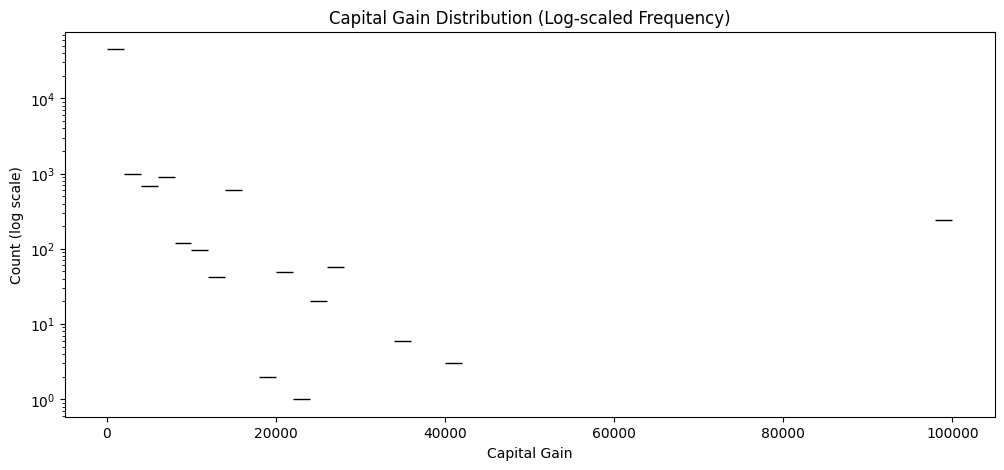

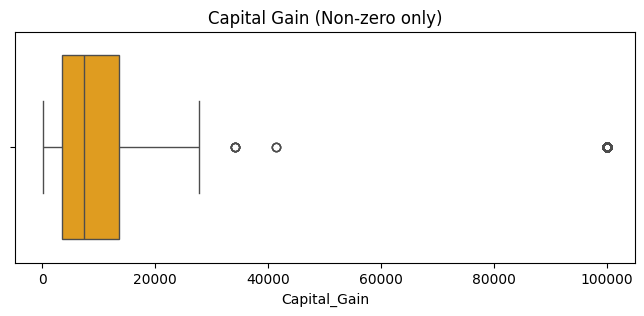

In [44]:
# CAPITAL GAIN
fd['Capital_Gain']=pd.to_numeric(fd['Capital_Gain'], errors='coerce')
gain_freq=fd.groupby('Capital_Gain')['fnlwgt'].sum().reset_index()
gain_freq.columns=['Capital_Gain', 'Gain_Frequency']  #renames the columns as age anf frequency
print(gain_freq)

# Capital Gain
plt.figure(figsize=(12,5))
sns.histplot(fd['Capital_Gain'], bins=50, color='skyblue', log_scale=(False, True))  # log y-axis
plt.title("Capital Gain Distribution (Log-scaled Frequency)")
plt.xlabel("Capital Gain")
plt.ylabel("Count (log scale)")
plt.show()

# Boxplot for non-zero Capital Gain
plt.figure(figsize=(8,3))
sns.boxplot(x=fd[fd['Capital_Gain'] > 0]['Capital_Gain'], color='orange')
plt.title("Capital Gain (Non-zero only)")
plt.show()


    Capital_Loss  Loss_Frequency
0            0.0    8.834501e+09
1          155.0    1.408450e+05
2          213.0    8.732690e+05
3          323.0    6.900670e+05
4          419.0    7.184570e+05
..           ...             ...
94        3175.0    1.596890e+05
95        3683.0    5.106510e+05
96        3770.0    7.672350e+05
97        3900.0    4.050220e+05
98        4356.0    3.959840e+05

[99 rows x 2 columns]


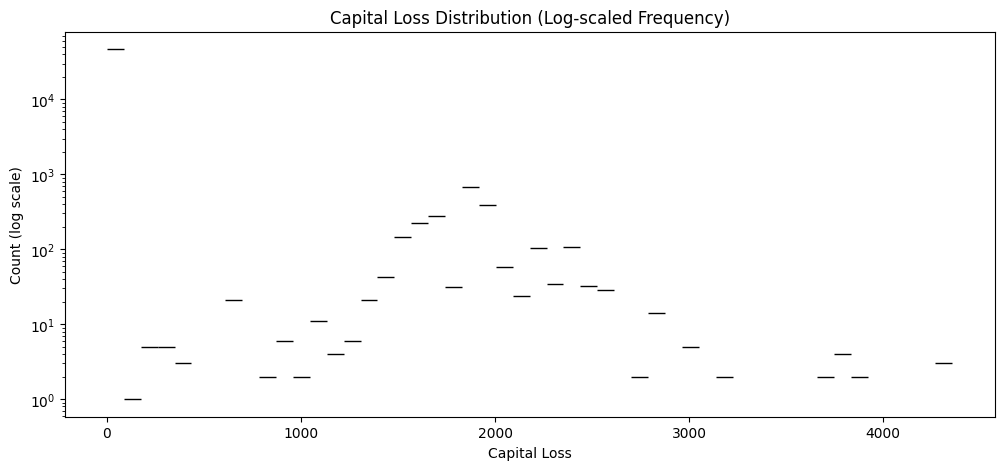

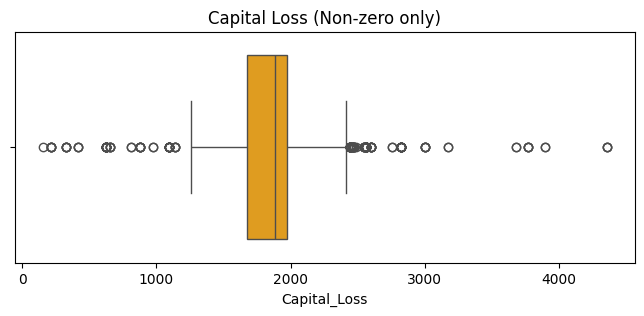

In [ ]:
# CAPITAL LOSS
fd['Capital_Loss']=pd.to_numeric(fd['Capital_Loss'], errors='coerce')
Loss_freq=fd.groupby('Capital_Loss')['fnlwgt'].sum().reset_index()
Loss_freq.columns=['Capital_Loss', 'Loss_Frequency']  #renames the columns as age anf frequency
print(Loss_freq)

# Capital Loss
plt.figure(figsize=(12,5))
sns.histplot(fd['Capital_Loss'], bins=50, color='skyblue', log_scale=(False, True))  # log y-axis
plt.title("Capital Loss Distribution (Log-scaled Frequency)")
plt.xlabel("Capital Loss")
plt.ylabel("Count (log scale)")
plt.show()

# Boxplot for non-zero Capital Gain
plt.figure(figsize=(8,3))
sns.boxplot(x=fd[fd['Capital_Loss'] > 0]['Capital_Loss'], color='orange')
plt.title("Capital Loss (Non-zero only)")
plt.show()

CAPITAL ACTIVITY: 

Capital Gain>0 or Capital loss>0

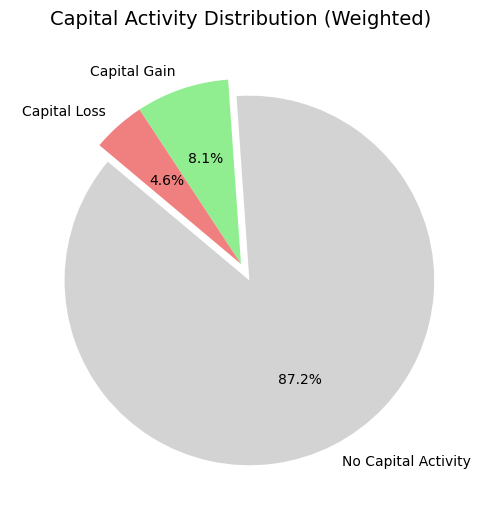

In [49]:
# Total weighted population
total_weight = fd['fnlwgt'].sum()

# Individuals with any capital activity (gain > 0 or loss > 0)
activity_gain_weight = fd[(fd['Capital_Gain'] > 0)]['fnlwgt'].sum()
activity_lose_weight = fd[(fd['Capital_Loss'] > 0)]['fnlwgt'].sum()

gain_prop= activity_gain_weight / total_weight * 100
lose_prop= activity_lose_weight / total_weight * 100

#pie chart for capital activity
labels = ['No Capital Activity', 'Capital Gain', 'Capital Loss']
sizes = [total_weight - (activity_gain_weight + activity_lose_weight), activity_gain_weight, activity_lose_weight]
colors = ['lightgrey', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 'No Capital Activity' slice    
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Capital Activity Distribution (Weighted)", fontsize=14)
plt.show()

In [50]:
# Ensure numeric
fd['Capital_Gain'] = pd.to_numeric(fd['Capital_Gain'], errors='coerce')
fd['Capital_Loss'] = pd.to_numeric(fd['Capital_Loss'], errors='coerce')

# Net Capital
fd['Net_Capital'] = fd['Capital_Gain'] - fd['Capital_Loss']

# Capital Activity indicator (1 if gain>0 or loss>0, else 0)
fd['Capital_Activity'] = ((fd['Capital_Gain'] > 0) | (fd['Capital_Loss'] > 0)).astype(int)

# --- Assuming you already have Age_Group and Hours_Group columns ---
grouped = fd.groupby(['Age_Group', 'Hours_Group']).apply(
    lambda g: pd.Series({
        'Avg_Net_Capital': np.average(g['Net_Capital'], weights=g['fnlwgt']),
        'Prop_Capital_Activity': np.average(g['Capital_Activity'], weights=g['fnlwgt'])
    })
).reset_index()

print(grouped)


   Age_Group Hours_Group  Avg_Net_Capital  Prop_Capital_Activity
0      Adult   Full-time       599.799552               0.105940
1      Adult   Over-time              NaN                    NaN
2      Adult   Part-time       193.887379               0.087876
3      Child   Full-time       789.435138               0.090601
4      Child   Over-time      4833.961558               0.234485
5      Child   Part-time        44.321303               0.021494
6     Senior   Full-time       628.221161               0.098698
7     Senior   Over-time      1932.025150               0.188055
8     Senior   Part-time       420.740479               0.100676
9      Youth   Full-time       586.839585               0.109992
10     Youth   Over-time      2244.461849               0.192168
11     Youth   Part-time       201.153745               0.083307


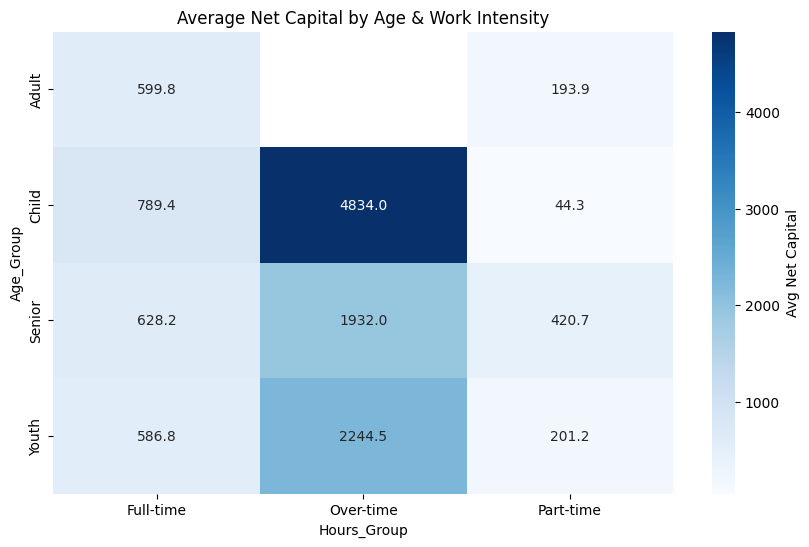

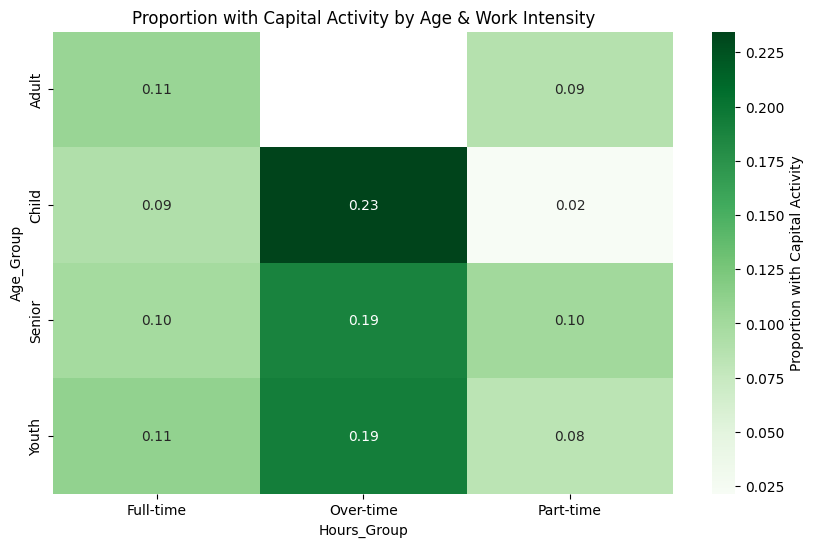

In [52]:
# --- Heatmap for Average Net Capital ---
pivot_capital = grouped.pivot(index="Age_Group", columns="Hours_Group", values="Avg_Net_Capital")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_capital, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Avg Net Capital'})
plt.title("Average Net Capital by Age & Work Intensity")
plt.show()

# --- Heatmap for Proportion with Capital Activity ---
pivot_activity = grouped.pivot(index="Age_Group", columns="Hours_Group", values="Prop_Capital_Activity")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_activity, annot=True, fmt=".2f", cmap="Greens", cbar_kws={'label': 'Proportion with Capital Activity'})
plt.title("Proportion with Capital Activity by Age & Work Intensity")
plt.show()

#### QUESTION 4